# Digesting PythonDataScienceHandbook by Jake VanderPlas 

<div class="alert alert-block alert-success">
[PythonDataScienceHandbook](https://github.com/IRebri/PythonDataScienceHandbook/tree/master/notebooks)
<li>My notes

</div>


## Part 2. Cut outliers via a robust sigma-clipping operation

In [1]:
# "Author": Rinat R. Ismagilov <ismagil@polly.phys.msu.ru>
#
# License: GNU General Public License v3.0

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time 
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = 10
# pd.options.display.float_format = '{:.1f}'.format

In [2]:
# nice practice

%load_ext version_information
# pip install version_information

%version_information numpy, pandas, matplotlib, seaborn, version_information

Software versions
Python 3.5.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.5.0
OS Windows 10 10.0.18362 SP0
numpy 1.10.1
pandas 0.20.3
matplotlib 3.0.0
seaborn 0.9.0
version_information 1.0.3
Tue Aug 20 17:02:49 2019 RTZ 2 (ceia)

### Dataset [Birthrate Data](https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv)

In [3]:
# shell command to download the data:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0   258k      0  0:00:01 --:--:--  0:00:01  344k


In [24]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
...,...,...,...,...,...
15542,2008,10,null,M,183219
15543,2008,11,null,F,158939
15544,2008,11,null,M,165468
15545,2008,12,null,F,173215


## sigma-clipping operation

In [25]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
quartiles, mu, sig

(array([ 4358. ,  4814. ,  5289.5]), 4814.0, 689.30999999999995)

In [26]:
# filter-out rows with births outside these values:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [27]:
births

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
...,...,...,...,...,...
15062,1988,12,29,M,5944
15063,1988,12,30,F,5742
15064,1988,12,30,M,6095
15065,1988,12,31,F,4435


In [41]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek
births['decade'] = 10* (births['year']//10)

C:\Anaconda3\envs\rebri_env\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\envs\rebri_env\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\envs\rebri_env\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

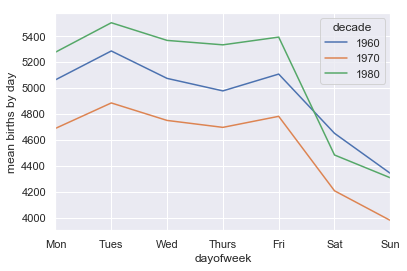

In [43]:
sns.set()
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');